# FFT Filters in Python
https://plot.ly/python/fft-filters/

In [17]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import numpy as np
import pandas as pd
import scipy

from scipy import signal

init_notebook_mode(connected=True)

## Get some data

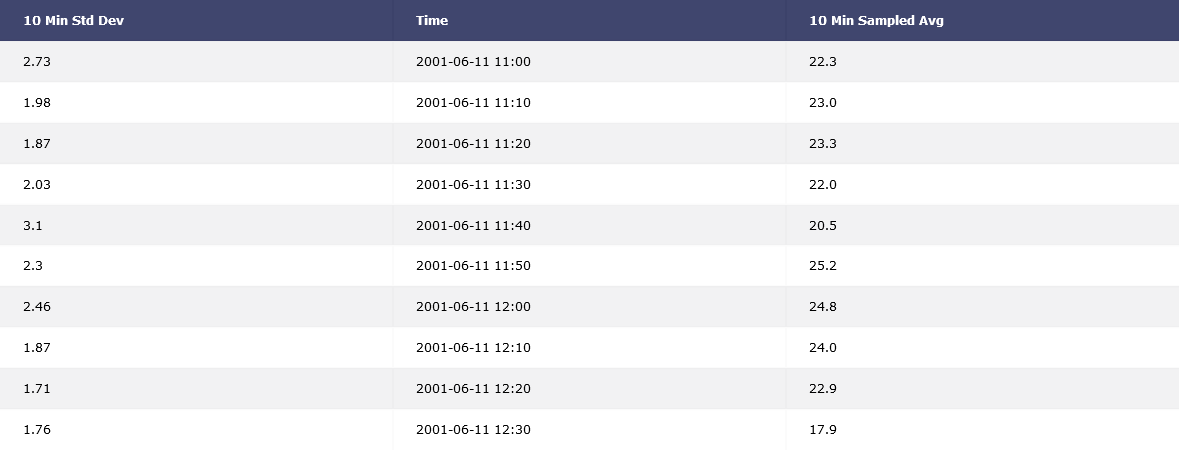

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
df = data[0:10]

table = ff.create_table(df)
py.iplot(table, filename='wind-data-sample')

## Plot the Data
Let's look at our data in its raw form before doing any filtering.

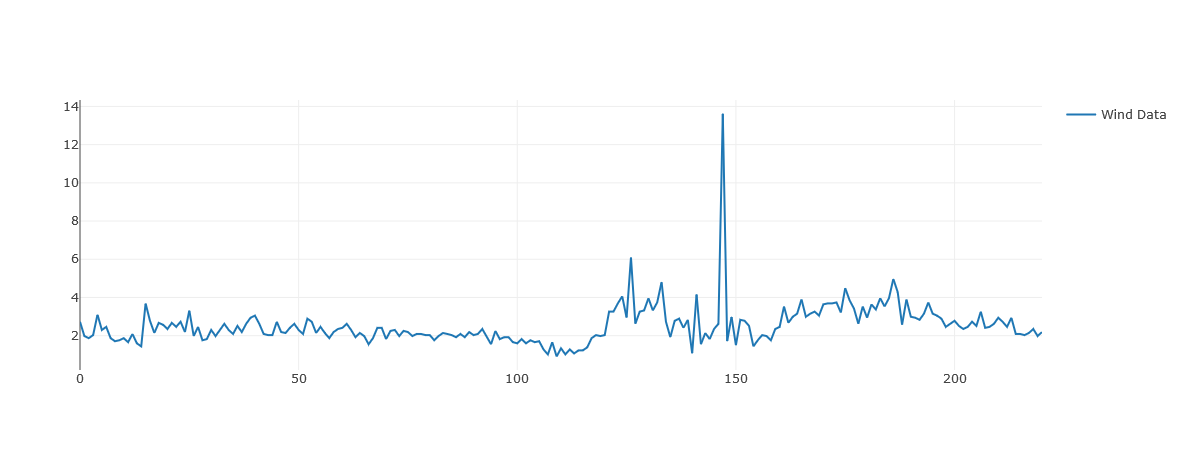

In [19]:
trace1 = go.Scatter(
    x=list(range(len(list(data['10 Min Std Dev'])))),
    y=list(data['10 Min Std Dev']),
    mode='lines',
    name='Wind Data'
)

layout = go.Layout(
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
py.iplot(fig, filename='wind-raw-data-plot')

## Low-Pass Filter
A Low-Pass Filter is used to remove the higher frequencies in a signal of data.

fc is the cutoff frequency as a fraction of the sampling rate, and b is the transition band also as a function of the sampling rate. N must be an odd number in our calculation as well.

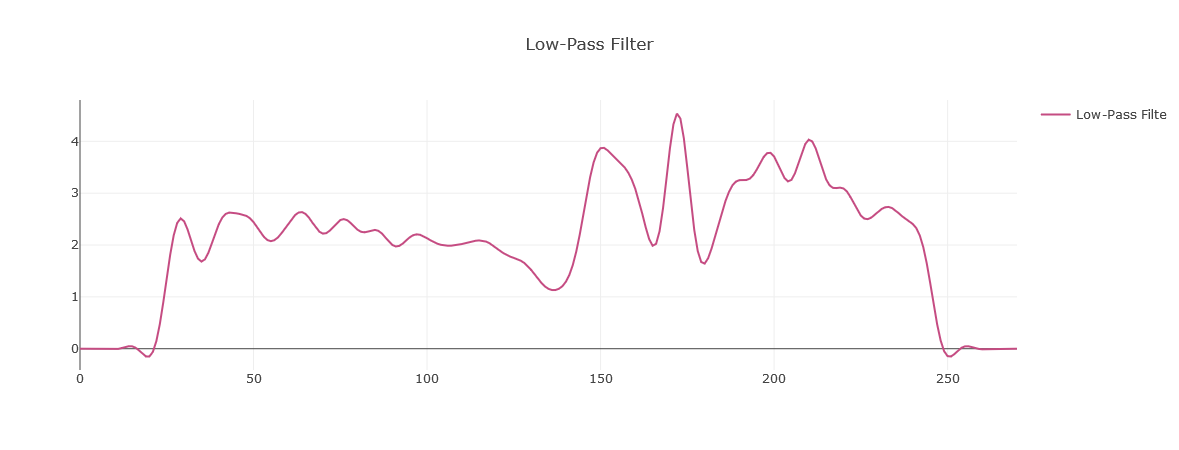

In [20]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)
 
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

s = list(data['10 Min Std Dev'])
new_signal = np.convolve(s, sinc_func)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='Low-Pass Filter',
    marker=dict(
        color='#C54C82'
    )
)

layout = go.Layout(
    title='Low-Pass Filter',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
py.iplot(fig, filename='fft-low-pass-filter')

## High-Pass Filter
Similarly a High-Pass Filter will remove the lower frequencies from a signal of data.

Again, fc is the cutoff frequency as a fraction of the sampling rate, and b is the transition band also as a function of the sampling rate. N must be an odd number.

Only by performing a spectral inversion afterwards after setting up our Low-Pass Filter will we get the High-Pass Filter.

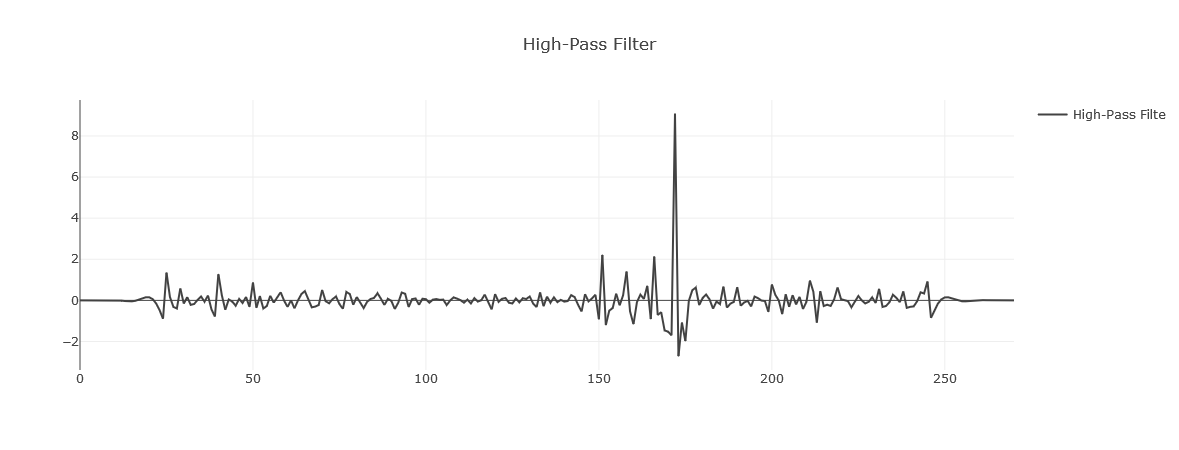

In [21]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)
 
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = np.blackman(N)
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

# reverse function
sinc_func = -sinc_func
sinc_func[int((N - 1) / 2)] += 1

s = list(data['10 Min Std Dev'])
new_signal = np.convolve(s, sinc_func)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='High-Pass Filter',
    marker=dict(
        color='#424242'
    )
)

layout = go.Layout(
    title='High-Pass Filter',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
py.iplot(fig, filename='fft-high-pass-filter')

## Band-Pass Filter
The Band-Pass Filter will allow you to reduce the frequencies outside of a defined range of frequencies. We can think of it as low-passing and high-passing at the same time.

In the example below, fL and fH are the low and high cutoff frequencies respectively as a fraction of the sampling rate.

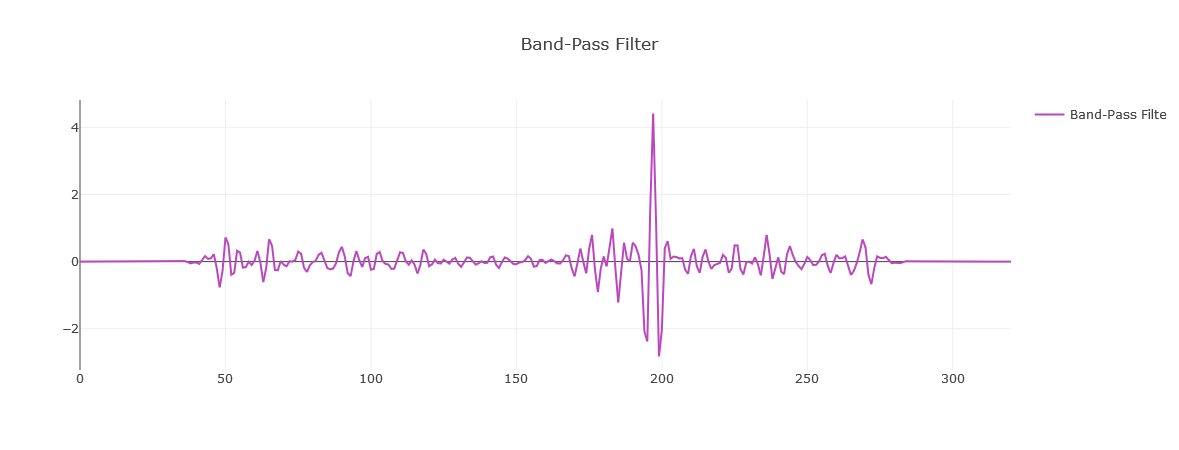

In [22]:
fL = 0.1
fH = 0.3
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)
 
# low-pass filter
hlpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
hlpf *= np.blackman(N)
hlpf = hlpf / np.sum(hlpf)
 
# high-pass filter 
hhpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
hhpf *= np.blackman(N)
hhpf = hhpf / np.sum(hhpf)
hhpf = -hhpf
hhpf[int((N - 1) / 2)] += 1
 
h = np.convolve(hlpf, hhpf)
s = list(data['10 Min Std Dev'])
new_signal = np.convolve(s, h)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='Band-Pass Filter',
    marker=dict(
        color='#BB47BE'
    )
)

layout = go.Layout(
    title='Band-Pass Filter',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
py.iplot(fig, filename='fft-band-pass-filter')